In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%matplotlib inline
import mrio
import select_consumption as select
import combine as combine
import visualization as visual
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.cluster.hierarchy as shc
from string import ascii_letters
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold = np.inf)

In [3]:
#visualize the SDG network heatmap 118*118

#import matrix and names
path = "C:/Users/lenovo/OneDrive/Mimi/SDGs/data/"
savepath = r'C:/Users/lenovo/OneDrive/Mimi/SDGs/data/final/'
# corr_file ='net_corr'
# file = 'net_rca'
# name_file = 'indicator_names'
# #import goals
name_file='goal_names'
corr_file ='net_corr_goal'
file = 'net_rca_goal'

##如果中文乱码，需要把csv在numbers里面另存为utf-8的格式，然后再读到这里面
sdg_rca=pd.read_csv(path+file+'.csv',header=None)
sdg_names = pd.read_csv(path+name_file+'.csv',encoding='utf-8-sig')
sdg_corr = pd.read_csv(path+corr_file+'.csv',header=None)

##organize the table
sdg_rca=sdg_rca.set_index(sdg_names['Goal_Indicators'])
sdg_rca=sdg_rca.set_axis(sdg_names['Goal_Indicators'],axis=1)

sdg_corr=sdg_corr.set_index(sdg_names['Goal_Indicators'])
sdg_corr=sdg_corr.set_axis(sdg_names['Goal_Indicators'],axis=1)

##create the sdg_names file for concate later with nodes information for indicators
# sdg_names.set_index('Goal_Indicators',inplace=True)
# sdg=sdg_names[['names']]
##if it is for goal, then we don't need names
sdg=sdg_names
#del sdg_rca['19 loss_pc']
sdg_rca

Goal_Indicators,1 no poverty,2 zero hunger,3 good health & well-being,4 quality education,5 gender equality,6 clean water & sanitation,7 affordable & clean energy,8 decent work & economic growth,"9 industry, innovation & infrastructure",10 reduced inequalities,11 sustainable cities & communities,12 responsible consumption & production,13 climate action,14 life below water,15 life on land,16 justice & strong institutions,17 partnerships for the goals
Goal_Indicators,,,,,,,,,,,,,,,,,
1 no poverty,0.000000,0.473684,0.631579,0.684211,0.421053,0.421053,0.105263,0.631579,0.473684,0.631579,0.684211,0.473684,0.368421,0.421053,0.421053,0.571429,0.578947
2 zero hunger,0.473684,0.000000,0.733333,0.411765,0.470588,0.388889,0.153846,0.307692,0.384615,0.466667,0.466667,0.333333,0.368421,0.571429,0.333333,0.428571,0.428571
3 good health & well-being,0.631579,0.733333,0.000000,0.529412,0.411765,0.277778,0.066667,0.400000,0.400000,0.600000,0.666667,0.444444,0.315789,0.666667,0.277778,0.476190,0.466667
4 quality education,0.684211,0.411765,0.529412,0.000000,0.529412,0.388889,0.235294,0.411765,0.470588,0.529412,0.705882,0.444444,0.421053,0.470588,0.500000,0.523810,0.529412
5 gender equality,0.421053,0.470588,0.411765,0.529412,0.000000,0.666667,0.470588,0.235294,0.352941,0.411765,0.470588,0.555556,0.684211,0.352941,0.611111,0.571429,0.352941
6 clean water & sanitation,0.421053,0.388889,0.277778,0.388889,0.666667,0.000000,0.500000,0.333333,0.222222,0.333333,0.222222,0.666667,0.736842,0.388889,0.833333,0.619048,0.277778
7 affordable & clean energy,0.105263,0.153846,0.066667,0.235294,0.470588,0.500000,0.000000,0.153846,0.250000,0.200000,0.066667,0.444444,0.578947,0.285714,0.500000,0.428571,0.214286
8 decent work & economic growth,0.631579,0.307692,0.400000,0.411765,0.235294,0.333333,0.153846,0.000000,0.461538,0.733333,0.533333,0.388889,0.263158,0.357143,0.388889,0.380952,0.642857
"9 industry, innovation & infrastructure",0.473684,0.384615,0.400000,0.470588,0.352941,0.222222,0.250000,0.461538,0.000000,0.466667,0.600000,0.333333,0.315789,0.357143,0.333333,0.238095,0.500000


C:\Users\lenovo\AppData\Local\Temp\ipykernel_22132\672883805.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.triu(np.ones_like(data,dtype=np.bool))
C:\Users\lenovo\AppData\Local\Temp\ipykernel_22132\672883805.py:15: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  row_linkage = shc.linkage(data, method='complete')
C:\Users\lenovo\AppData\Local\Temp\ipykernel_22132\672883805.py:16: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  col_linkage = shc.linkage(data.T, method='comp

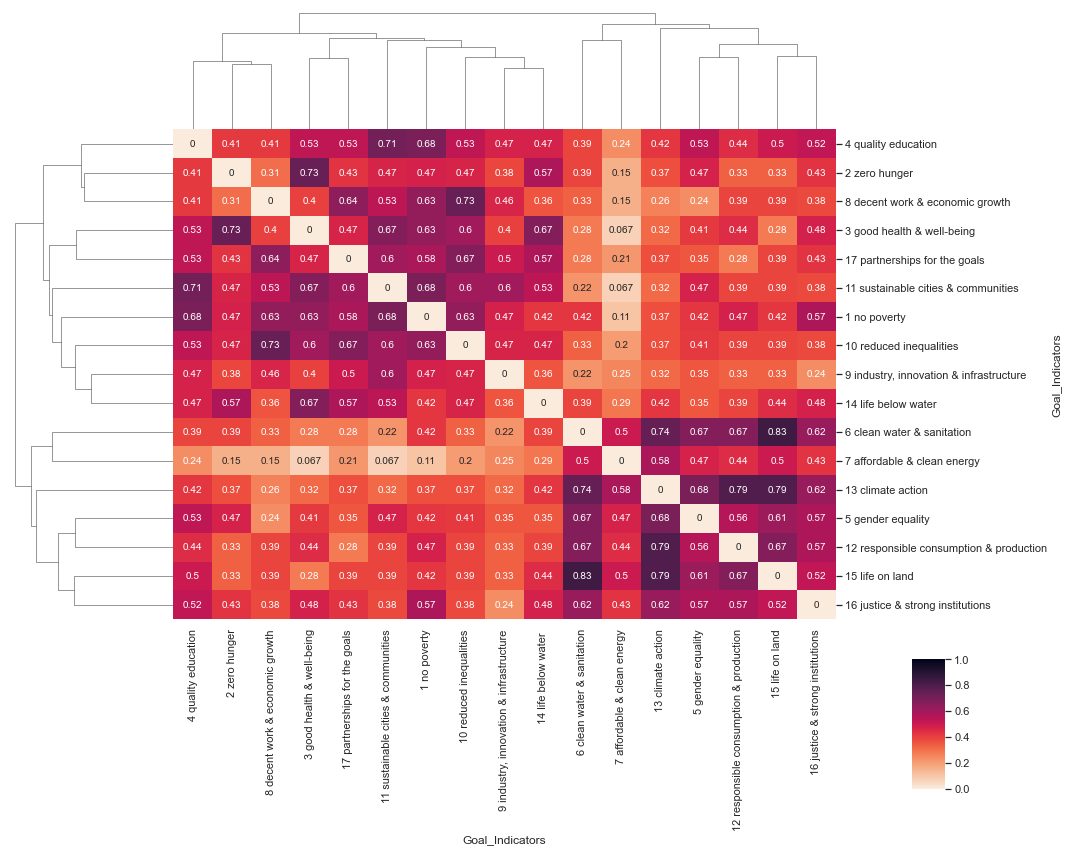

In [4]:
##heatmap
#input values

input_data=sdg_rca
input_value=0
data=input_data
#plt.figure(figsize=(8,8))
mask=np.triu(np.ones_like(data,dtype=np.bool))
#cmap = sns.diverging_palette(230, 20, as_cmap=True)
cmap = sns.color_palette("rocket_r", as_cmap=True)
# heatmap=sns.heatmap(data,mask=mask,cmap=cmap,annot=True,
# #                   annot_kws={"size": 7})
# heatmap.set_title('Correlation Heatmap from RCA for 118 SDG indicators',fontdict={'fontsize':18},pad=12)
# fig=heatmap.get_figure() 
row_linkage = shc.linkage(data, method='complete')
col_linkage = shc.linkage(data.T, method='complete')


cg = sns.clustermap(data, row_linkage=row_linkage, col_linkage=col_linkage,method="complete",
                    cmap=cmap, annot=True, annot_kws={"size": 10},
                    vmin=0, vmax=1, figsize=(15,12),
                    row_colors=None, col_colors=None,
#                    row_cluster=False, col_cluster=False,

                    linewidths=0, linecolor='white')
cg.cax.set_position((.85,0.08,.03,.15))
cg.savefig(savepath+'RCA.png',dpi=300,bbox_inches='tight')


C:/Users/lenovo/OneDrive/Mimi/SDGs/data/final/


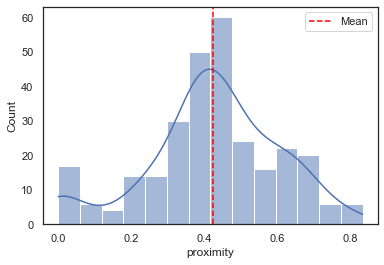

In [8]:
#prepare the dataset for network analysis

data=pd.DataFrame(input_data.unstack()) #turn network data from wide to long
data.index.names=['source','target']
data=pd.DataFrame(data.reset_index())
data.columns= ['source', 'target', 'weight']
data = data.sort_values(by='weight', ascending=False)
data=data[data['weight']<=1]

#create three graphs: all data, synergies only, and tradeoffs only
sns.set_style("white")
data=data[data['weight']>=input_value]

# calculate the mean of the variable
mean = data["weight"].mean()


# generate the histogram plot with a density plot on top
g=sns.histplot(data=data, x="weight",  alpha=0.5, kde=True)

# add a vertical line to highlight the mean
plt.axvline(mean, color='red', linestyle='--', label="Mean")

# add a legend to indicate the density line, histogram, and mean value in x axis
plt.legend()
g.set_xlabel("proximity")

# save the plot as a PNG image
print(savepath)
plt.savefig(savepath+"density_distribution.png", dpi=300, bbox_inches='tight')

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


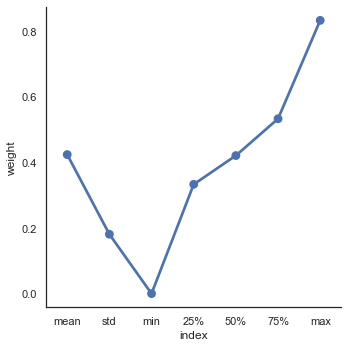

In [18]:
num_col = data._get_numeric_data().columns
describe_num_df = data.describe(include=['int64','float64'])
describe_num_df.reset_index(inplace=True)
# To remove any variable from plot
describe_num_df = describe_num_df[describe_num_df['index'] != 'count']
for i in num_col:
  if i in ['index']:
    continue
  sns.factorplot(x='index', y=i, data=describe_num_df)
  plt.show()

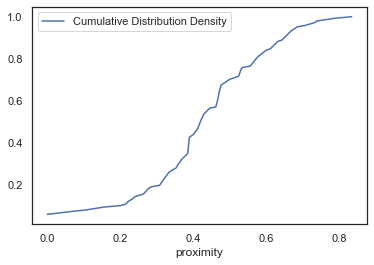

In [69]:
stats_df = data\
.groupby('weight') \
['weight'] \
.agg('count') \
.pipe(pd.DataFrame) \
.rename(columns = {'weight': 'frequency'})

# PDF
stats_df['pdf'] = stats_df['frequency'] / sum(stats_df['frequency'])

# CDF
stats_df['Cumulative Distribution Density'] = stats_df['pdf'].cumsum()
stats_df = stats_df.reset_index()
stats_df
cg=stats_df.plot(x = 'weight', y = [ 'Cumulative Distribution Density'], grid = False)
cg.set_xlabel("proximity")
plt.savefig(savepath+'distribution.png',dpi=300,bbox_inches='tight')

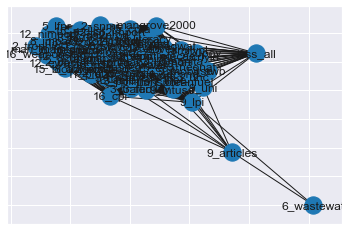

In [78]:
#netowrk simple visualization
import networkx as nx
#plt.figure(figsize=(8,8))

g =nx.from_pandas_edgelist(data,source='source',target='target',edge_attr='weight')
#nx.draw_kamada_kawai(g,with_labels=True,node_color='skyblue',width=0.3,font_size=8)
nx.draw_networkx(g)


In [79]:
#visualization modifications of the goals
'''
for different network, we need to modify colors and sizes. 

'''
number_to_adjust_by =5
pallete =["yellowgreen",'mediumorchid','forestgreen','firebrick']
#https://matplotlib.org/2.0.2/examples/color/named_colors.html
from bokeh.io import output_notebook, show, save
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine, EdgesAndLinkedNodes, NodesAndLinkedEdges, LabelSet
from bokeh.plotting import figure
from bokeh.plotting import from_networkx
from bokeh.palettes import Blues8, Reds8, Purples8, Oranges8, Viridis8, Spectral8,Viridis256
from bokeh.transform import linear_cmap
from networkx.algorithms import community



degrees = dict(nx.degree(g))
#print(degrees)
nx.set_node_attributes(g, name='degree', values=degrees)

weighted_degrees = dict(nx.degree(g, weight='weight'))
#print(weighted_degrees)
nx.set_node_attributes(g, name='weighted_degree', values=weighted_degrees)

#calculate the betweenness values.
betweenness_centrality = nx.betweenness_centrality(g)
nx.set_node_attributes(g, name='betweenness', values=betweenness_centrality)
#if degree are too small to notice, we need to slightly adjust the nodes
adjusted_node_size = dict([(node, int(degree+number_to_adjust_by)) for node, degree in nx.degree(g)])

#adjusted_node_size = dict([(node, int(weighted_degree+number_to_adjust_by)) for node, weighted_degree in nx.degree(g,weight='weight')])
#print(adjusted_node_size)
nx.set_node_attributes(g, name='adjusted_node_size', values=adjusted_node_size)



#calculate communities

communities = community.greedy_modularity_communities(g)
print(len(communities)) #we have 93 communities for all sdg interactions
#print(communities)

# Create empty dictionaries
modularity_class = {}
modularity_color = {}
goal={}

#Loop through each community in the network, since we have 93 communities, 
#we categorize communities with only one indicator as one community
#it turns to have 4 communities.

for community_number, community in enumerate(communities):
    #For each member of the community, add their community number and a distinct color
    
    #print(community_number)
        
    for name in community: 
        goal[name]=name.split('_')[0]  
        if len(community)>1:
            
            modularity_class[name] = community_number
            modularity_color[name] = pallete[community_number]
                  
        else:
            modularity_class[name]=99
            modularity_color[name]= 'lightgrey'

            
'''
The Girvan–Newman algorithm detects communities by progressively removing edges from the original network. 
The connected components of the remaining network are the communities. 
Instead of trying to construct a measure that tells us which edges are the most central to communities,
the Girvan–Newman algorithm focuses on edges that are most likely “between” communities.
Applying it to the small karate club:
# '''
from networkx import edge_betweenness_centrality as betweenness
def most_central_edge(g):
    centrality = betweenness(g, weight="weight")
    return max(centrality, key=centrality.get)

#communities = sorted(community.greedy_modularity_communities(G_karate), key=len, reverse=True)
result=nx.community.girvan_newman(g, most_valuable_edge=most_central_edge)
print(tuple(sorted(c) for c in next(result)))

# girvan=next(result)
# print(girvan)

# girvan_class = {}
# girvan_color = {}
# for group_num,group in enumerate(girvan):
#     for name in group:
#         print(name)
#         dex_name=list(g.nodes(data=True))[name][0][:2]  #china's province values
#         print(dex_name)
#         girvan_class[dex_name]=group_num
#         girvan_color[dex_name]=Viridis8[group_num]


        
#create weight colors
SAME_CLUB_COLOR, DIFFERENT_CLUB_COLOR = "olive", "tomato"

edge_attrs = {}

for start_node, end_node, wt in g.edges.data('weight'):
    edge_color = SAME_CLUB_COLOR if wt>=0.4 else DIFFERENT_CLUB_COLOR
    edge_attrs[(start_node, end_node)] = edge_color

nx.set_edge_attributes(g, edge_attrs, "edge_color")


#create weight width
edge_attrs = {}

for start_node, end_node, wt in g.edges.data('weight'):
    if wt>=0.6:
        edge_width = "0.6" 
    else:
        edge_width = "0.2"
    edge_attrs[(start_node, end_node)] = edge_width

nx.set_edge_attributes(g, edge_attrs, "edge_width")
        
# Add modularity class and color as attributes from the network above
nx.set_node_attributes(g, modularity_class, 'modularity_class')
nx.set_node_attributes(g, modularity_color, 'modularity_color')
nx.set_node_attributes(g,goal,'goal')

#nx.set_node_attributes(g, girvan_class, 'girvan_class')
#nx.set_node_attributes(g, girvan_color, 'girvan_color') 

2
(['11_pipedwat', '11_pm25', '11_slums', '11_transport', '12_ewaste', '12_msw', '12_nimport', '12_nprod', '12_so2import', '12_so2prod', '13_co2gcp', '13_co2import', '14_biomar', '14_cleanwat', '14_cpma', '14_discard', '14_trawl', '15_biofrwter', '15_cpta', '15_forchg', '15_redlist', '16_cpi', '16_detain', '16_rsf', '16_safe', '16_u5reg', '16_weaponsexp', '17_cohaven', '17_govex', '17_statperf', '1_320pov', '1_wpc', '2_crlyld', '2_obesity', '2_snmi', '2_stunting', '2_trophic', '2_undernsh', '2_wasting', '3_births', '3_fertility', '3_hiv', '3_lifee', '3_matmort', '3_ncds', '3_neonat', '3_pollmort', '3_swb', '3_tb', '3_traffic', '3_u5mort', '3_uhc', '3_vac', '4_earlyedu', '4_literacy', '4_primary', '4_second', '5_edat', '5_familypl', '5_lfpr', '5_parl', '6_freshwat', '6_sanita', '6_scarcew', '6_water', '7_cleanfuel', '7_co2twh', '7_elecac', '8_adjgrowth', '8_impacc', '8_slavery', '8_unemp', '9_articles', '9_intuse', '9_lpi', '9_mobuse', '9_uni', 'loss_all', 'man_maintain', 'mangrove2000'

In [80]:
#organize all attributes
nodes_df = pd.DataFrame(dict(g.nodes(data=True))).T
nodes_df=nodes_df.sort_values(by=['modularity_class','weighted_degree'])
nodes_df

,degree,weighted_degree,betweenness,adjusted_node_size,modularity_class,modularity_color,goal
mangrove2000,53,19.232348,0.002202,58,0,yellowgreen,mangrove2000
5_lfpr,47,24.306934,0.000274,52,0,yellowgreen,5
15_cpta,68,29.088461,0.002114,73,0,yellowgreen,15
2_trophic,51,29.192174,0.000351,56,0,yellowgreen,2
15_redlist,60,29.679537,0.001046,65,0,yellowgreen,15
12_nimport,49,29.93495,0.000126,54,0,yellowgreen,12
2_snmi,59,31.154475,0.001575,64,0,yellowgreen,2
man_maintain,55,31.739194,0.000405,60,0,yellowgreen,man
8_impacc,57,33.396641,0.000592,62,0,yellowgreen,8
3_hiv,63,33.404927,0.000954,68,0,yellowgreen,3


In [85]:
merge=pd.merge( test,nodes_df, left_index=True, right_index=True)
merge=merge.iloc[:,[2,4,5,8,10]]
merge

,weight,degree,weighted_degree,modularity_class,goal
4_earlyedu,0.315789,72,39.639453,1,4
3_fertility,0.352941,65,28.330953,1,3
11_pipedwat,0.380952,74,40.639832,1,11
3_births,0.380952,72,40.88973,1,3
1_wpc,0.391304,75,41.381232,0,1
7_co2twh,0.400000,76,40.204097,0,7
3_tb,0.409091,74,40.445481,1,3
16_detain,0.411765,73,37.617752,1,16
16_cpi,0.411765,55,21.019703,1,16
16_safe,0.411765,77,35.536705,1,16


In [88]:
test = nx.to_pandas_edgelist(g)

test=test.sort_values(by=['weight']) 
test=test[test['target']=='mangrove2000']
test=test.set_index('target')
test

,source,edge_color,weight,edge_width
target,,,,
mangrove2000,13_co2gcp,tomato,0.300000,0.2
mangrove2000,2_undernsh,tomato,0.300000,0.2
mangrove2000,5_edat,tomato,0.300000,0.2
mangrove2000,1_wpc,tomato,0.304348,0.2
mangrove2000,7_cleanfuel,tomato,0.312500,0.2
mangrove2000,4_primary,tomato,0.315789,0.2
mangrove2000,12_nprod,tomato,0.315789,0.2
mangrove2000,16_u5reg,tomato,0.315789,0.2
mangrove2000,2_wasting,tomato,0.315789,0.2
